### 빅데이터분석개론 토픽10
- 2024 . 07 . 02


-------

#### 10단원. numpy로 수치 데이터를 처리

- list보다 numpy의 array가 훨씬 빠름
    - 대용량의 배열과 행렬 연산을 빠르게 수행
    
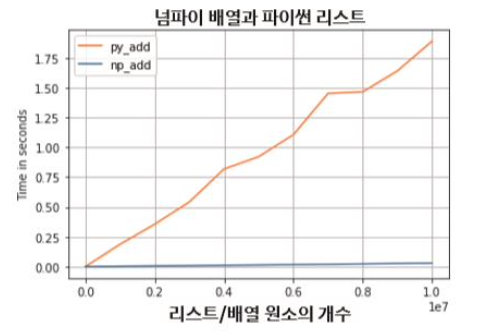

- 다차원 배열 ndarray (n dimension array / 배열과 리스트는 다르다)
    - numpy에서 차원은 axis라고 부름
    - 각 요소는 index로 참조됨
    - 장점
        - c언어 기반 배열 구조 == 메모리 적게 차지 == 속도 빠름
        - 배열과 배열 간 수학적 연산을 적용 가능
        - 고급 연산자 및 함수 제공 

In [1]:
# 파이썬 리스트

mid_scores = [10, 20, 30]
final_scores = [70, 80, 90]

total = mid_scores + final_scores
print (total) # 행렬간 합이 일어나야 할 것 같은데, 리스트 병합이 일어남

# ndarray는 서로 +하면 행렬합됨

[10, 20, 30, 70, 80, 90]


In [3]:
# numpy 배열

import numpy as np

mid_scores = np.array([10, 20, 30]) # ndarray 객체 만듦
final_scores = np.array([70, 80, 90]) # ndarray 객체 만듦

total = mid_scores + final_scores # 행렬합
print (total) 
print (total/2) # 상수배

[ 80 100 120]
[40. 50. 60.]


In [5]:
# numpy의 사칙연산

a = b = np.array(range(1, 11))
print (a + b)
print (a - b)
print (a * b)
print (a / b)

[ 2  4  6  8 10 12 14 16 18 20]
[0 0 0 0 0 0 0 0 0 0]
[  1   4   9  16  25  36  49  64  81 100]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


-------------

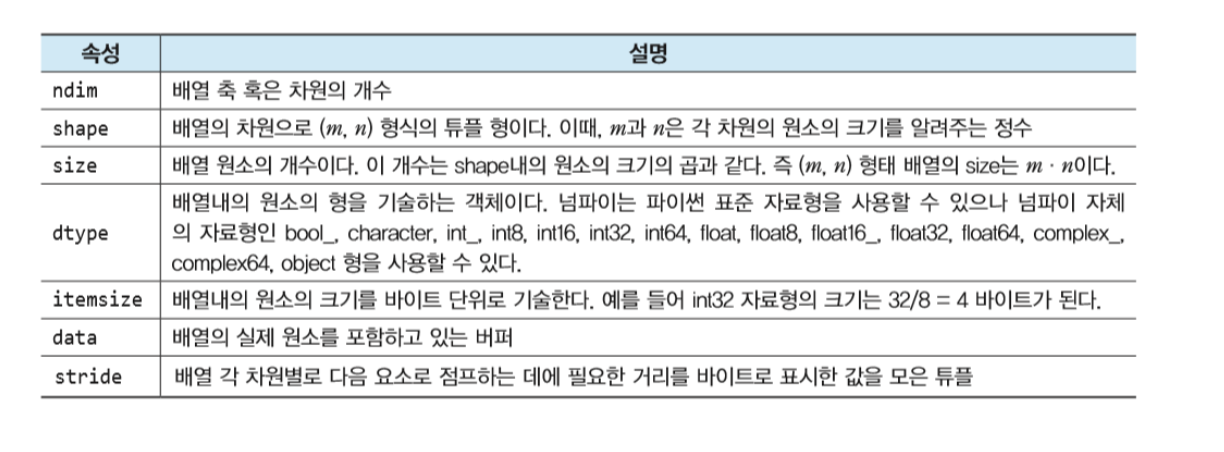

|타입|범위|unsigned|
|:------:|:---:|:---:|
|int8|-2^7~2^7-1|0~2^8-1|
|int16|-2^15~2^15-1|0~2^16-1|
|int32|-2^31~2^31-1|0~2^32-1|
|int64|-2^63~2^63-1|0~2^64-1|

- **numpy는 ndarray 안 compoonent의 자료형이 모두 동일해야 함**
- 마치 c언어의 배열과 거의 동일

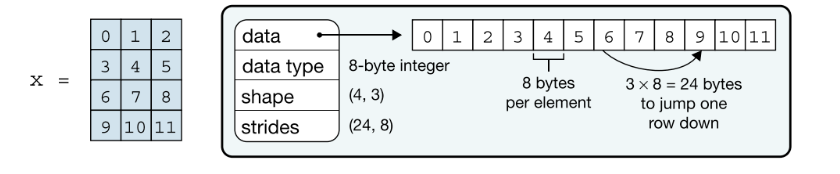

In [10]:
# 다차원 배열 ndarray의 속성

a = np.array(range(1, 11))
print (a.shape) # 객체의 형태
print (a.ndim) # 객체의 차원 (axis의 갯수)
print (a.dtype) # 객체 내부 자료형
print (a.itemsize) # 객체 내부 자료형이 차지하는 메모리 크기 (int32 == 32bit == 4byte)
print (a.size) # 전체 항목 수

print (2 ** 16)

(10,)
1
int64
8
10
65536


In [13]:
# 실습

array_a = np.array(range(1, 11))
array_b = np.array(range(10))
array_c = np.array([val for val in range(10) if val % 2 == 0])

print (array_c.shape) # 5 by 1
print (array_c.ndim) # 1차원
print (array_c.dtype) # int64
print (array_c.size) # 5개
print (array_c.itemsize) # 64bit == 8byte

(5,)
1
int64
5
8


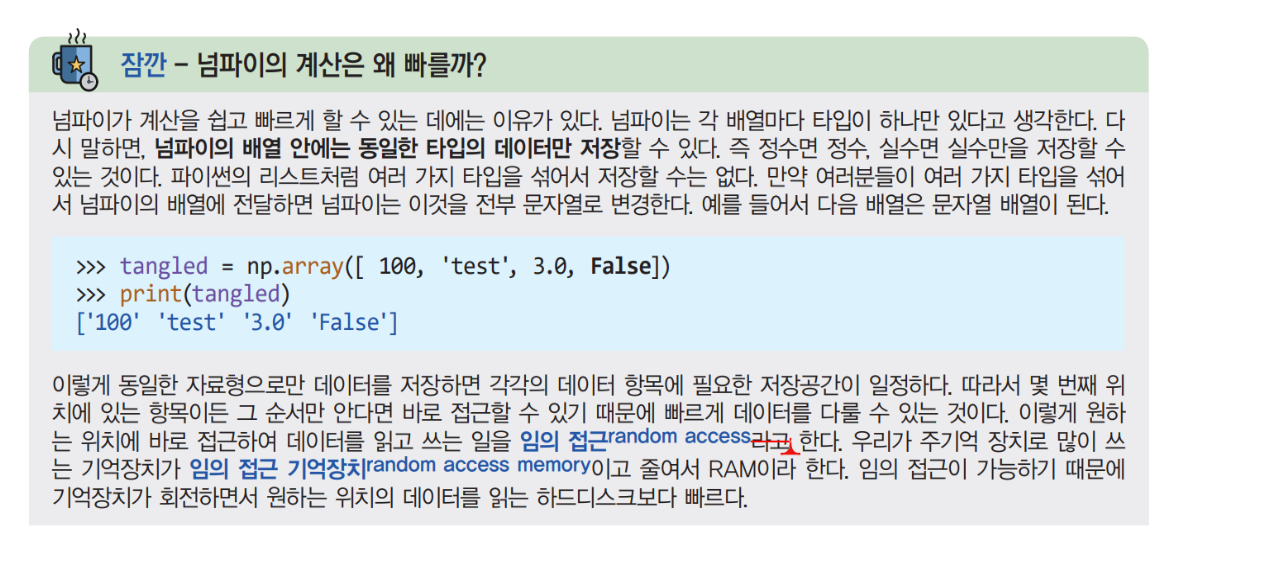

- numpy는 동일 타입의 데이터만 저장 가능
    - 만약 ndarray 안에 여러 자료형 있다 -> 모든 원소의 자료형을 문자열로 바꿈
- 임의 접근 (random access) == 원하는 위치에 바로 접근하여 데이터를 쓰는 일 -> 빠르다
- random access memory == RAM

In [17]:
# ndarray도 슬라이싱, 인덱싱 가능 (리스트랑 동일함)

array = np.array(range(1, 11))
print (array[0:3])
print (array[::2])
print (array[::-1])

# 음수 인덱싱도 동일함
print (array[3:-1])

[1 2 3]
[1 3 5 7 9]
[10  9  8  7  6  5  4  3  2  1]
[4 5 6 7 8 9]


In [20]:
# logical indexing
# 조건을 주고, 그 조건에 맞는지 맞지 않는지 여부를 확인

ages = np.array([18, 19, 20, 21, 22, 23, 24])
rst = ages > 19 # 19 초과인 것만 true

print (rst)

# 인덱스를 쓰는 위치에다가 조건을 쓰면 그 조건에 맞는 배열 추출
print(ages[ages > 19])
print(ages[ages % 2 == 0])

[False False  True  True  True  True  True]
[20 21 22 23 24]
[18 20 22 24]


-----------

- 기존 리스트 : 이름이 리스트의 참조값을 가짐
- ndarray : n차원 배열을 1차원으로 변환 후 참조값 가짐 (RAM에서는 1차원으로 저장됨)

In [33]:
# 2차원 배열 == 리스트의 리스트

y = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print (y[0][0], y[1][0], y[2][0])
print (y)

array_y = np.array(y)

# 2차원 리스트의 특정 인덱스는 ,로 구분 ([][]보다 빠르다)
# [0][2] == [0, 2]
print (array_y[0][0], array_y[1][0], array_y[2][0])
print (array_y[0, 0], array_y[1, 0], array_y[2, 0]) # 위와 같음
print (array_y)

# 특정 요소 변경
array_y[0, 0] = 100
print (array_y[0])

1 4 7
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
1 4 7
1 4 7
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[100   2   3]


In [32]:
array_y[0, 0] = 3.14
print (array_y[0]) # 3 2 3 (int로 자료형이 결정)
# ndarray는 모든 항목이 동일한 자료형을 가지기 때문

[3 2 3]


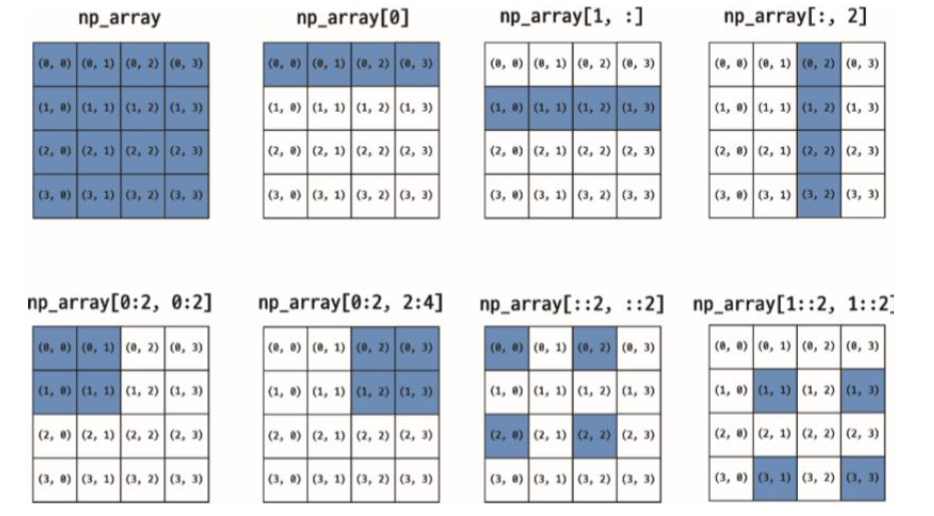

In [39]:
# 2차원 ndarray 슬라이싱

np_array = np.array([[i+j for j in range (4)] for i in range (1, 16, 4)])
print (np_array)

print ()

print (np_array[0:2, 2:4]) # 0~1행, 2~3열
print (np_array[::2, ::2]) # 0, 2행, 0, 2열
print (np_array[:, 2]) # 2열
print (np_array[2, :]) # 2행

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

[[3 4]
 [7 8]]
[[ 1  3]
 [ 9 11]]
[ 3  7 11 15]
[ 9 10 11 12]


In [44]:
# 리스트 슬라이싱과 numpy 스타일 슬라이싱의 차이

print (np_array)

print ()

print (np_array[::2][::2]) # 0행, 2행 선택 / 그 중 0행 선택
print (np_array[::2, ::2]) # 0행, 2행 선택 / 0열 2열 선택

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

[[1 2 3 4]]
[[ 1  3]
 [ 9 11]]


In [49]:
# 실습

players = [[170, 76], [183, 86.2], [181, 78], [176, 80]]
players = np.array(players)

# 몸무게가 80 이상
print (players[players[:, 1] >= 80]) # 모든 행에서의 1번째 열의 값이 80 이상

# 키가 180 이상
print (players[players[:, 0] >= 180])

[[183.   86.2]
 [176.   80. ]]
[[183.   86.2]
 [181.   78. ]]


In [45]:
# logical indexing

rst = np_array > 5
print (rst)
print (np_array[np_array > 5]) # 1차원 배열이 출력된다는 걸 기억
print (np_array[np_array % 2 == 0]) # 짝수

[[False False False False]
 [False  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[ 6  7  8  9 10 11 12 13 14 15 16]
[ 2  4  6  8 10 12 14 16]


In [47]:
# 문자 데이터 저장하는 ndarray

x = np.array([['a', 'b', 'c', 'd'], ['c', 'c', 'g', 'h']])
print (x == 'c')

[[False False  True False]
 [ True  True False False]]


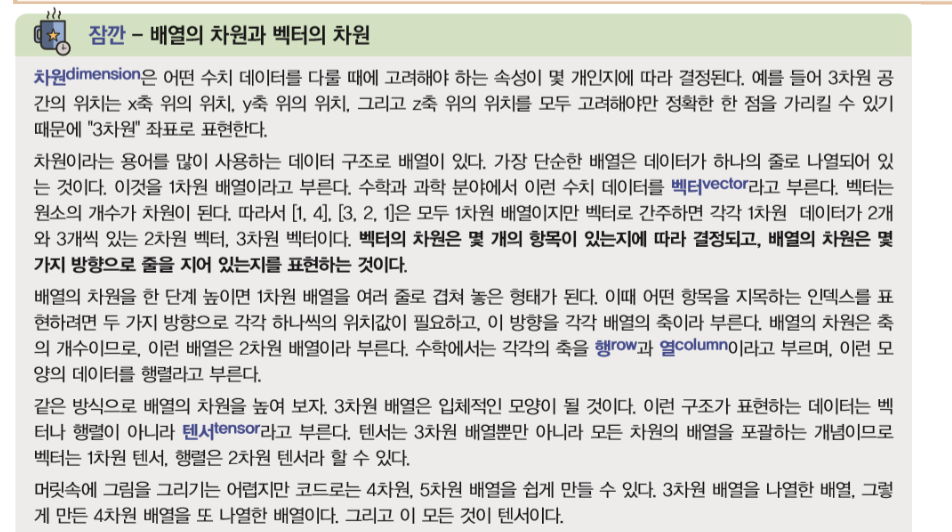

------

In [52]:
# arange() vs range()
# arange == numpy 배열을 만드는 함수 (range랑 사용법 동일)

print (np.arange(5))
print (np.arange(1, 10))

# arange == np.array(range(~~~~))

[0 1 2 3 4]
[1 2 3 4 5 6 7 8 9]


In [59]:
# linspace(), logspace()
# 둘 다 균등한 간격으로 실수 생성하는 함수
# linspace() : start에서 stop까지의 데이터 생성 (실수)
# logspace() : 10^start에서 10^stop까지의 데이터 생성 (실수)

# num 속성 : 범위 안에 몇개의 num?
# base 속성 : 밑 지정 (logspace)

print (np.logspace(1, 10, num = 10, base = 2))
print (np.linspace(1, 100, num = 10))

[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]
[  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]


In [64]:
# reshape() : shape 변경
# n by m 배열을 l by k 배열로 reshape하려면 n * m == l * k 만족해야 함

y = np.arange(12)
print (y)

y = y.reshape(3, 4) 
print (y)

y = y.reshape(y.size, 1)
print (y)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


In [67]:
# flatten() : 평탄화 함수, 2차원 배열 이상의 고차원 배열 -> 1차원 배열
y = [[[1, 2], [3, 4]], [[3, 4], [5, 6]]]
y = np.array(y)
print (y)

y = y.flatten()
print (y)

[[[1 2]
  [3 4]]

 [[3 4]
  [5 6]]]
[1 2 3 4 3 4 5 6]


-----

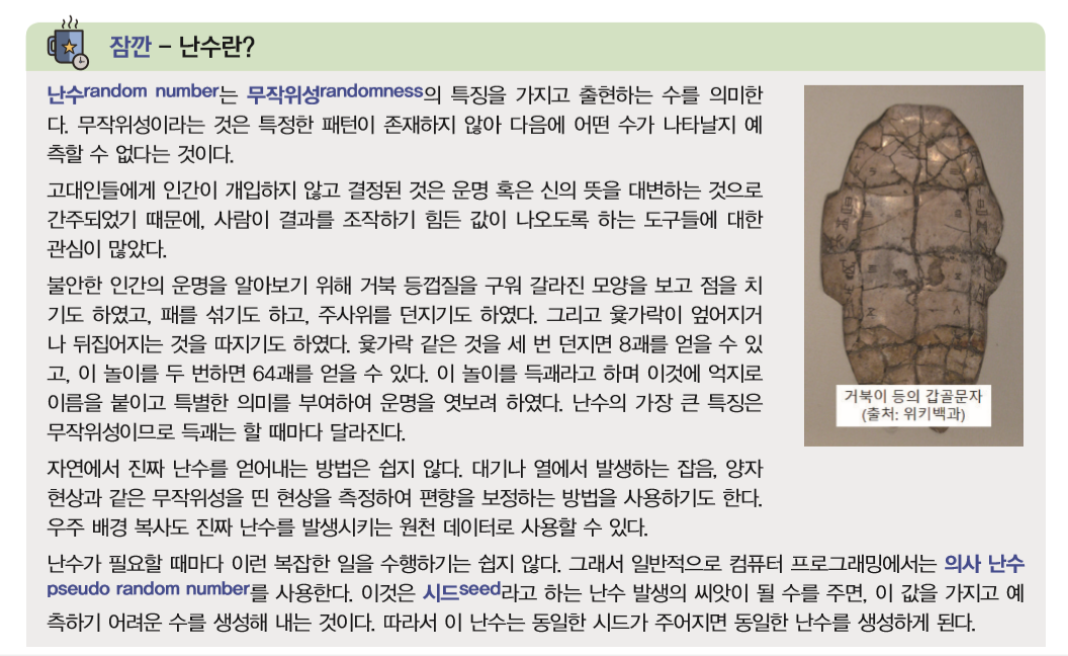

- 의사 난수 : 컴퓨터가 특정 규칙을 가지고 생성하는 수
    - 시드 == 난수 발생 규칙, 시드가 같으면 같은 난수가 발생할 수 있음
- 난수는 무작위성을 가지고 있음, 균일한 확률 분포로 생성
- 표준편차가 크다 -> 분산이 크다 -> 데이터가 평균으로부터 많이 떨어져있다

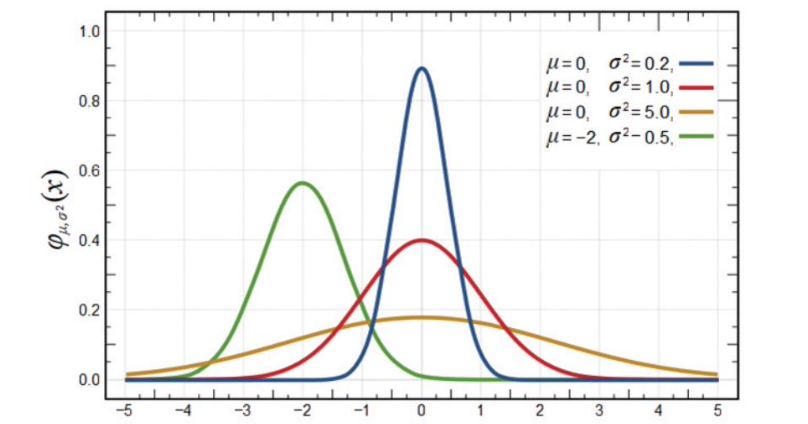

In [75]:
# 난수 만들기 (실수)
np.random.seed(100) # seed 설정
print (np.random.rand(5)) # 5개의 난수가 포함된 배열을 만듦
print (np.random.rand(5, 3)) # 5 by 3

# 난수 만들기 (정수)
print (np.random.randint(1, 7, size=10)) # 1에서 7 이하
print (np.random.randint(1, 10, size=(2, 2))) # 2행 2열 

[0.54340494 0.27836939 0.42451759 0.84477613 0.00471886]
[[0.12156912 0.67074908 0.82585276]
 [0.13670659 0.57509333 0.89132195]
 [0.20920212 0.18532822 0.10837689]
 [0.21969749 0.97862378 0.81168315]
 [0.17194101 0.81622475 0.27407375]]
[4 4 4 2 2 6 4 1 3 2]
[[4 3]
 [6 9]]


In [81]:
# randn : 특정 난수, 하지만 0에 가까운 수들 (이상치 발생)
print (np.random.randn(5))

# 평균이 10이고 표준편차가 2인 정규분포 난수
mu = 10
sigma = 2
randoms = mu + sigma * np.random.randn(2, 2) # 2 by 2
print (randoms)

[-0.60377052  0.68596725  0.85997379  0.19155544  1.17822793]
[[11.20056714  6.31068027]
 [10.08517618  9.95183002]]


In [89]:
# 10개 난수 생성하고, 평균과 중앙값 구하기
numbers = np.random.randn(10)
print (numbers)
print (np.mean(numbers)) # 평균
print (np.median(numbers)) # 중앙값

[-1.0063895   2.32409463 -0.34597849 -0.39753342  1.06573088 -1.62005104
  0.32176684  0.47595427  1.31019671 -0.19974096]
0.1928049919955102
0.06101293946191613


In [90]:
# zeros : 모든 배열의 값이 0
print (np.zeros((100, 100))) # 100 by 100인 행렬

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


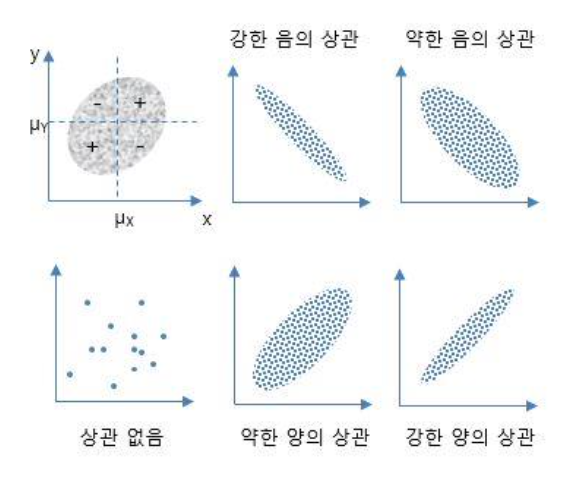

- 키가 큰 사람이 몸무게도 많이 나갈 것이다 -> 상관관계가 양
- corrcoef(x, y)로 두 요소의 상관관계 계산 가능 (계산 결과는 2 by 2 행렬 / 리스트를 넣음)
    - diagonal은 전부 1 (자기 자신과의 상관관계)
    - 1행 2열은 C_xy, 2행 1열은 C_yx



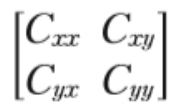

In [95]:
# 상관관계 파악하기

x = [i for i in range (1, 101)]
y = [i ** 2 for i in range (1, 101)]

rst = np.corrcoef([x, y]) # 리스트 
print (rst) # 상관이 매우 강하다 (양의 상관관계)

[[1.         0.96885447]
 [0.96885447 1.        ]]


In [94]:
# 상관관계 3차원

x = [i for i in range (1, 101)]
y = [i ** 2 for i in range (1, 101)]
z = [i ** 3 for i in range (1, 101)]

rst = np.corrcoef([x, y, z])
print (rst)

[[1.         0.96885447 0.91755196]
 [0.96885447 1.         0.98608688]
 [0.91755196 0.98608688 1.        ]]
